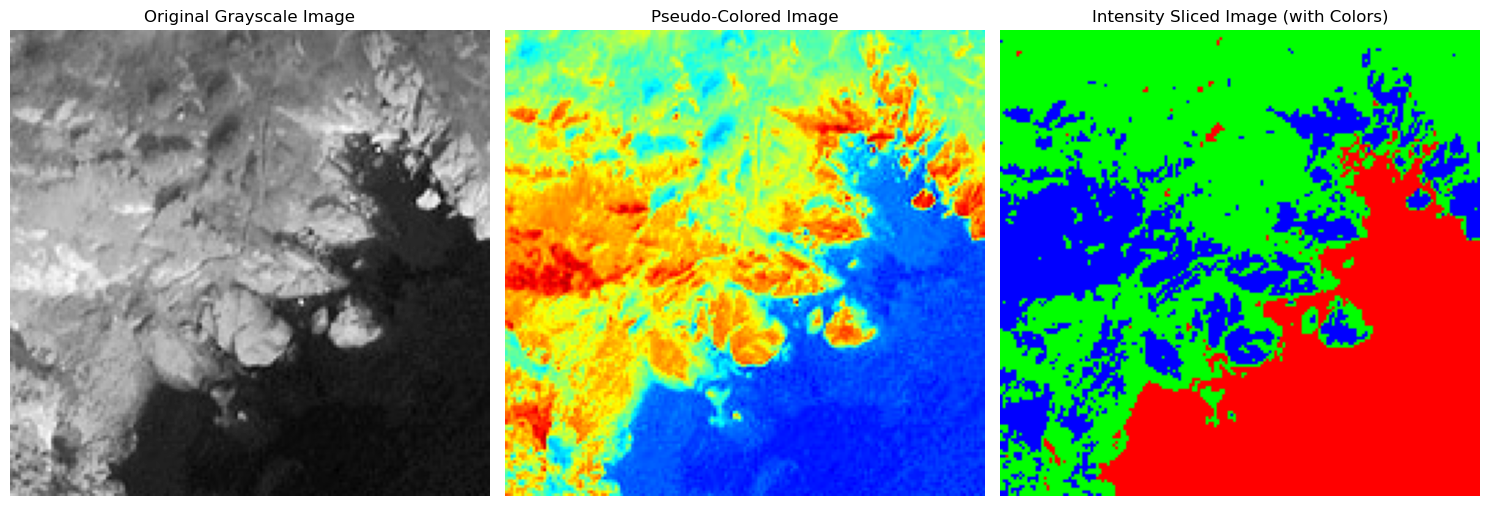

In [3]:
"""
This program demonstrates and compares two techniques for visualizing intensity variations in a grayscale image: 
pseudo-coloring and intensity slicing with colors.

## 1. Pseudo-Coloring:
   - Pseudo-coloring maps grayscale intensity values to a color gradient using predefined colormaps.
   - It provides smooth transitions across intensity values, enhancing visual interpretation.
   - Example: OpenCV's `COLORMAP_JET` creates a rainbow gradient (blue to red) for intensity variations.
   - **Use Case**: Best suited for data visualization where subtle differences in intensity need to be observed.

## 2. Intensity Slicing with Colors:
   - Intensity slicing groups intensity values into specific ranges and assigns distinct colors to each range.
   - Unlike pseudo-coloring, this technique does not create smooth transitions but highlights specific ranges.
   - Example: 
     - Low intensity (0–85): Blue
     - Medium intensity (86–170): Green
     - High intensity (171–255): Red
   - **Use Case**: Useful for segmentation or feature detection where distinct regions need to be highlighted.

## Key Differences:
| Feature                  | Pseudo-Coloring                  | Intensity Slicing with Colors          |
|--------------------------|-----------------------------------|-----------------------------------------|
| **Color Mapping**        | Smooth gradient across intensity | Discrete colors for intensity ranges   |
| **Transition**           | Gradual transitions             | Sharp boundaries                       |
| **Purpose**              | Data visualization              | Segmentation or feature highlighting   |
| **Output Appearance**    | Color gradients (e.g., rainbow) | Distinct color bands (e.g., blue, green, red) |

## Program Steps:
1. Load a grayscale image.
2. Apply pseudo-coloring using OpenCV's colormap.
3. Implement intensity slicing with distinct color mapping.
4. Display the original grayscale, pseudo-colored, and intensity-sliced images side by side for comparison.

## Applications:
- **Pseudo-Coloring**:
  - Remote sensing: Visualizing terrain, water, or vegetation.
  - Medical imaging: Heatmaps or subtle density variations in X-rays or CT scans.
- **Intensity Slicing**:
  - Highlighting features in satellite imagery.
  - Segmenting specific regions in medical scans (e.g., tumors or organs).

This program showcases the output of both techniques, highlighting their distinct visual effects.
"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the grayscale image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'worldview-1.jpg')  # Replace with your image path

if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

# Load the image in grayscale mode
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is None:
    raise ValueError(f"Failed to load the image at: {image_path}")

# Step 2: Apply Pseudo-Coloring
pseudo_color_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)  # Using OpenCV colormap
pseudo_color_image_rgb = cv2.cvtColor(pseudo_color_image, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

# Step 3: Apply Intensity Slicing with Colors
height, width = gray_image.shape
color_sliced_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map intensity ranges to specific colors
for i in range(height):
    for j in range(width):
        intensity = gray_image[i, j]
        if intensity <= 85:  # Low intensity
            color_sliced_image[i, j] = [255, 0, 0]  # Blue
        elif 86 <= intensity <= 170:  # Medium intensity
            color_sliced_image[i, j] = [0, 255, 0]  # Green
        else:  # High intensity
            color_sliced_image[i, j] = [0, 0, 255]  # Red

# Step 4: Visualize all results side by side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Grayscale Image
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Original Grayscale Image")
ax[0].axis("off")

# Pseudo-Colored Image
ax[1].imshow(pseudo_color_image_rgb)
ax[1].set_title("Pseudo-Colored Image")
ax[1].axis("off")

# Intensity Sliced Image with Colors
ax[2].imshow(color_sliced_image)
ax[2].set_title("Intensity Sliced Image (with Colors)")
ax[2].axis("off")

plt.tight_layout()
plt.show()
